# **Drug categorization using a Random Forest Classifier**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('drug200.csv')
df[10:20]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
10,47,F,LOW,HIGH,11.767,drugC
11,34,F,HIGH,NORMAL,19.199,DrugY
12,43,M,LOW,HIGH,15.376,DrugY
13,74,F,LOW,HIGH,20.942,DrugY
14,50,F,NORMAL,HIGH,12.703,drugX
15,16,F,HIGH,NORMAL,15.516,DrugY
16,69,M,LOW,NORMAL,11.455,drugX
17,43,M,HIGH,HIGH,13.972,drugA
18,23,M,LOW,HIGH,7.298,drugC
19,32,F,HIGH,NORMAL,25.974,DrugY


# Pandas Profilling
Pandas profiling makes the EDA automated and easy to use. It provides us with a comprehensive report of the dataset as well as several EDA results in a single frame. We get several EDA demonstrations in one frame. It is interactive and generated by a few lines of code.

In [ ]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport

profile=ProfileReport(df,title='Drug Types Detection')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

we have the following sections in the output section:
* Overview
* variables 
* interactions
* correlations
* missing values
* sample

# 1) Overview section
overview section gives us the statistical information of dataset. we have three subsections in overview section such as <br>
overview,alerts and reproduction.In the overview section,number of variables,observations,samples,missing cell,duplicated rows,</br>
memory size</br>
In our dataset,
# No of variables=6 : numerical=2(Age,Na_to_K) & categorical=4(sex,BP,Cholesterol,Drug)
# no of observation=200=number of rows
# Missing cell= 0, so no need to handle
# Duplicated rows=0


# Alert section
This section explains the strong correlationship between variables.</br>
In our dataset:<br>
# High correlationship= BP & Drug column





# 2)Variable Section
The variable section will be different for the numerical and categorical column.

# For the Numerical column:
it explains distinct, missing value, mean, zeros, memory size and provides the histogram as well.<br>
if we click on the more details tab then we have found statistics (mean.median,skewness,Q1,Q3 and many more)<br>
# For the age column:
mean=44.315<br>
median=45</br>
skewness=0.030308357</br>
As the values of mean and median are so close, we can infer that Age column carries a normal distribution<br>

# for the Na_to_K column:
mean=16.084485<br>
median=13.9365<br>
skewness=1.0393412</br>
From the analysis, we can conclude that this is not normally distributed, so we have to use Transformer to make it normally distributed.

<br>
<br><br><br>

# for the categorical columns:
it describes Distinct (unique) values, distinct percentage, missing, missing percentage, memory size, and a horizontal bar presentation of all the unique values with count presentation.<br>

# for the Sex column:
Male= 104(52%)<br>
Female=96(48%)<br>
Males patiens are more than female patient.<br>

# for the BP column:
HIGH	77	38.5%<br>
LOW	    64	32.0%</br>
NORMAL	59	29.5%</br>
High and Low Blood Pressure(BP) patients have higher BPs than Normal patients.

# for the cholesterol:
HIGH	103	    51.5%<br>
NORMAL	97  48.5%<br>
The patients with high and normal cholesterol are close to each other.

# for the Drug column:
DrugY	91	45.5%<br>
drugX	54	27.0%<br>
drugA	23	 11.5%<br>
drugC	16	 8.0%<br>
drugB	16	 8.0%<br>
From the exploration, we can conclude that most of the drug types are from Drug y &x.


# Interaction Section
This section describes bivariate and multivariate analysis in detail. 

# Correlation section
It provides the pearson correlationship between variables.

# Missing values section
Demonstrated the null values with count graph.

# Sample section
displays the first and last 10 rows of the dataset


# Analyse the target column

In [ ]:
import plotly.express as px
fig = px.pie(df,names='Drug', title='Drug Distribution')
fig.show()

From the plot, we inferred that we have five types of drugs. Most of the drugs are from X and Y. So we can conclude that our target drug column has imbalanced data. To overcome this issue, we can use resampling techniques.

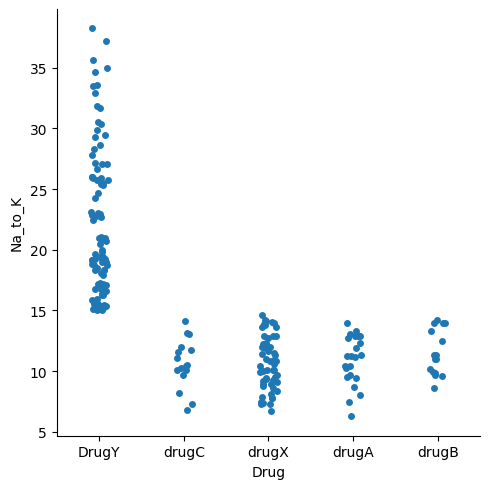

In [ ]:
sns.catplot(x="Drug", y="Na_to_K",data=df)

Drug Y is only used by patients with Na to k ratio > 15
<BR>
Others drugs are used by patients with Na to k ratio <15

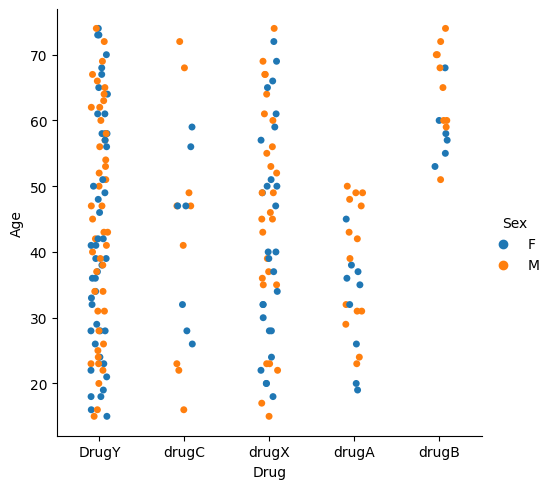

In [ ]:
sns.catplot(x="Drug", y="Age",hue="Sex",data=df)


we can conclude that
* Drug B is only used by patients of Age > 50
* Drug A is only used by patients of Age < 50

# Label Encoder

convert the categorical columns to numerical.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    print(f'cols for label encoding : {columnsToEncode}')
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df
df= Encoder(df)
df[:5]



cols for label encoding : ['Sex', 'BP', 'Cholesterol', 'Drug']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


 Now, all the columns are in numeric form.

# Now, the categorical columns of the dataset are as follows:
  
For sex column:
* Male= 1
* Female= 0

For BP Column:
* High= 0
* Low= 1
* Normal= 2

For Cholesterol column:
* High= 0
* Normal=1

For Drug column:
* Drug A=1
* Drug B=2
* Drug C=3
* Drug X=4
* Drug Y=0
    

# **Applying transformer na-to-k**

In [ ]:
df = df[df['Na_to_K']>0]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


lambda : -0.35278551267106073


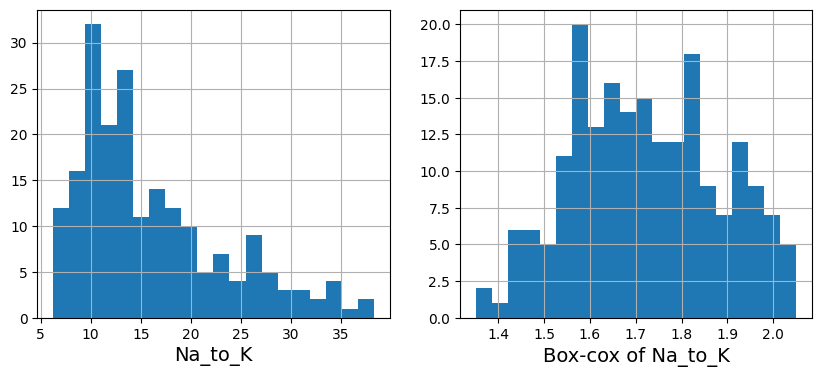

In [ ]:
from scipy.stats import boxcox

y = df['Na_to_K']
y, fitted_lambda= boxcox(y, lmbda=None)

print("lambda :",fitted_lambda)

df['boxcox_Na_to_K'] = y

# plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_xlabel('Na_to_K', fontsize=14)
ax2.set_xlabel('Box-cox of Na_to_K', fontsize=14)

df['Na_to_K'].hist(ax=ax1, bins=20)
df['boxcox_Na_to_K'].hist(ax=ax2, bins=20)

plt.show()

In [ ]:
df.drop('Na_to_K',axis=1,inplace=True)
df


,Age,Sex,BP,Cholesterol,Drug,boxcox_Na_to_K
0,23,0,0,0,0,1.928526
1,47,1,1,0,3,1.690615
2,47,1,1,0,3,1.581538
3,28,0,2,0,4,1.461141
4,61,0,1,0,0,1.812982
...,...,...,...,...,...,...
195,56,0,1,0,3,1.639494
196,16,1,1,0,3,1.655097
197,52,1,2,0,4,1.571778
198,23,1,2,1,4,1.717892


Text(0.5, 1.0, 'Boxplot of Age column')

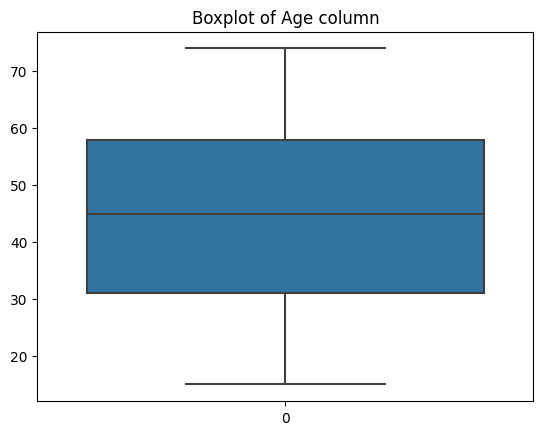

In [ ]:
sns.boxplot(df['Age'])
plt.title("Boxplot of Age column")



Text(0.5, 1.0, 'Boxplot of boxcox_Na_to_K column')

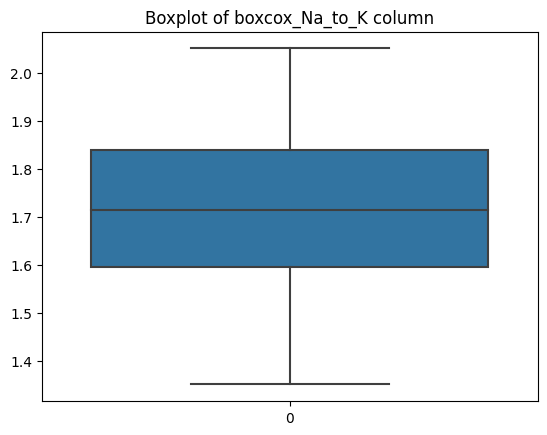

In [ ]:
sns.boxplot(df['boxcox_Na_to_K'])
plt.title("Boxplot of boxcox_Na_to_K column")

* Age column has no outliers
* After applying boxcox transformer on Na_to_K, now no outliers present in boxcox_Na_to_K column

# **Define x,y**

In [ ]:
x=df.drop('Drug',axis=1)
y=df['Drug']

# 2. Apply Random Forest 

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**SMOTE**(Synthetic Minority Oversampling Technique)<br>
it is a powerful solution for imbalance data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
count=Counter(y_train)
print("Before",count)

sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)
count=Counter(y_train_sm)
print("After",count)

Before Counter({0: 72, 4: 40, 1: 20, 2: 15, 3: 13})
After Counter({0: 72, 1: 72, 4: 72, 2: 72, 3: 72})


before count,we found imbalance ratio among the drug types <br>
after count, it becomes balanced using SMOTE


In [ ]:
def evaluation(model):
    from sklearn.metrics  import classification_report,confusion_matrix,f1_score
    model_predictions = model.predict(x_test)
    print("confusion matrix is:\n",confusion_matrix(y_test, model_predictions))
    print("\nClassification report is:\n",classification_report(y_test, model_predictions))
    # calculate probabilities
    pred_prob_svm = model.predict_proba(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(x_train, y_train)
rf.score(x_train,y_train)*100
evaluation(rf)

confusion matrix is:
 [[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]

Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 3. Fine-tune Hyperparameters for Random Forest with GridSearch 

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
rf={
    'n_estimators':[100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['entropy','gini'],
    }

In [ ]:
model=RandomForestClassifier()

In [ ]:
rfsearch=GridSearchCV(estimator=model,param_grid=rf,cv=3,verbose=3)

In [ ]:
rfsearch.fit(x_train_sm,y_train_sm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.992 total time=   0.2s
[CV 2/3] END criterion=entropy, max_features=auto, n_estimators=100;, score=1.000 total time=   0.2s
[CV 3/3] END criterion=entropy, max_features=auto, n_estimators=100;, score=0.992 total time=   0.2s
[CV 1/3] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.992 total time=   0.3s
[CV 2/3] END criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.3s
[CV 3/3] END criterion=entropy, max_features=auto, n_estimators=200;, score=0.992 total time=   0.4s
[CV 1/3] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.992 total time=   0.5s
[CV 2/3] END criterion=entropy, max_features=auto, n_estimators=300;, score=1.000 total time=   0.5s
[CV 3/3] END criterion=entropy, max_features=auto, n_estimators=300;, score=0.992 total time=   0.5s
[CV 1/3] END criterion=entropy

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

# **4. Show best score and best Hyperparameters/ parameters**

In [ ]:
# printing best hyperparameters
rfsearch.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy', n_estimators=100,max_features= 'auto')
rf.fit(x_train_sm, y_train_sm)
rf.score(x_train_sm,y_train_sm)*100

100.0